In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
salaries = pd.read_csv("./Salary_Data.csv")

In [9]:
salaries.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Question : depression or

In [11]:
salaries.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


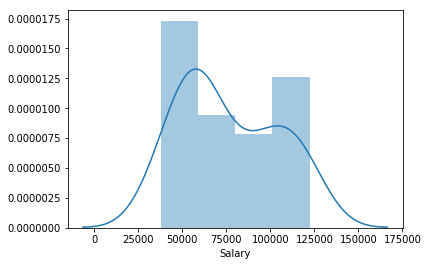

In [12]:
sns.distplot(salaries["Salary"])

In [15]:
from sklearn.model_selection import train_test_split
X = salaries[["YearsExperience"]]
y = salaries['Salary']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)2


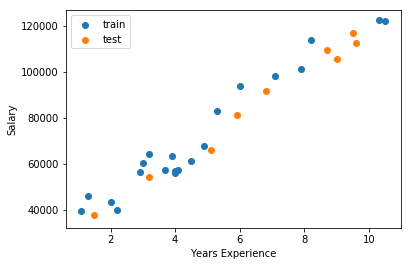

In [24]:
# plot train set
plt.scatter(x=X_train,y=y_train,label='train')

#plot for test set
plt.scatter(x=X_test, y=y_test,label='test')
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.legend(); #add label

In [27]:
#create model
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [30]:
lr.fit(X=X_train,y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
lr.coef_

array([9577.17174975])

In [32]:
lr.intercept_

25975.814659541138

In [34]:
predict_test= lr.predict(X=X_test)

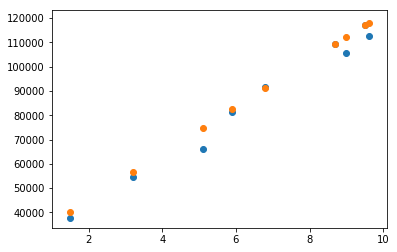

In [36]:
plt.scatter(X_test,y_test,label="actual")
plt.scatter(X_test,predict_test,label="predict")

In [38]:
#calculate MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,predict_test))
#calculate RMSE

17978409.49734413


In [39]:
#Extra Polynomial repression

In [40]:
from sklearn.preprocessing import PolynomialFeatures
X_train.head()

,YearsExperience
28,10.3
10,3.9
3,2.0
1,1.3
19,6.0


In [42]:
#S=b+0 + b_1*YE
#S = b+0 + b_1*YE+ b_2*YE^2

In [43]:
poly_model = PolynomialFeatures(degree=2)

In [45]:
X_train_poly = poly_model.fit_transform(X_train)
X_test_poly = poly_model.fit_transform(X_test)

In [46]:
X_train_poly
#[X0,X1,X2]

array([[  1.  ,  10.3 , 106.09],
       [  1.  ,   3.9 ,  15.21],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   1.3 ,   1.69],
       [  1.  ,   6.  ,  36.  ],
       [  1.  ,   7.9 ,  62.41],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   2.9 ,   8.41],
       [  1.  ,   4.5 ,  20.25],
       [  1.  ,   1.1 ,   1.21],
       [  1.  ,   7.1 ,  50.41],
       [  1.  ,   2.2 ,   4.84],
       [  1.  ,   3.2 ,  10.24],
       [  1.  ,   4.1 ,  16.81],
       [  1.  ,   3.7 ,  13.69],
       [  1.  ,   4.9 ,  24.01],
       [  1.  ,  10.5 , 110.25],
       [  1.  ,   8.2 ,  67.24],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   5.3 ,  28.09],
       [  1.  ,   4.  ,  16.  ]])

In [49]:
# train poly repression model
#Linear Repression model trains with poly features
poly_lr = LinearRegression()
poly_lr.fit(X_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
print(poly_lr.coef_)
print(poly_lr.intercept_)

[   0.         9313.9762626    22.73262965]
26557.223350824344


In [51]:
poly_prediction = poly_lr.predict(X_test_poly)

In [52]:
poly_prediction

array([ 90943.41873142, 109309.44957349,  56594.72951873,  82301.0061382 ,
        40579.33616143, 118066.43462014, 117091.61767125,  74649.77798722,
       112224.35271571])

In [53]:
print(mean_squared_error(y_test,poly_prediction))

18023836.126327895
